In [134]:
import os, sys
sys.path.append('../src/')

from copulae1 import *

import json
with open('../src/configs/config_CRIX_future_Open_v3_MM.json','r') as file:
    config = json.load(file)
config
data_name = config['data_name']
calibration_method  = config['calibration_method']
OHR1 = pd.read_csv('../results/'+data_name +'/'+calibration_method+'/OHR.csv')

copulae_names = np.unique(OHR1.copula)
copulae_names = np.delete(copulae_names,copulae_names=='t_Copula_Capped',0) # Remove t copula capped
OHR1.head()

risk_emasre_names = np.unique(OHR1.loc[:,'risk measure'])

In [135]:
rm = risk_emasre_names[0]
print(rm)

ERM k=10


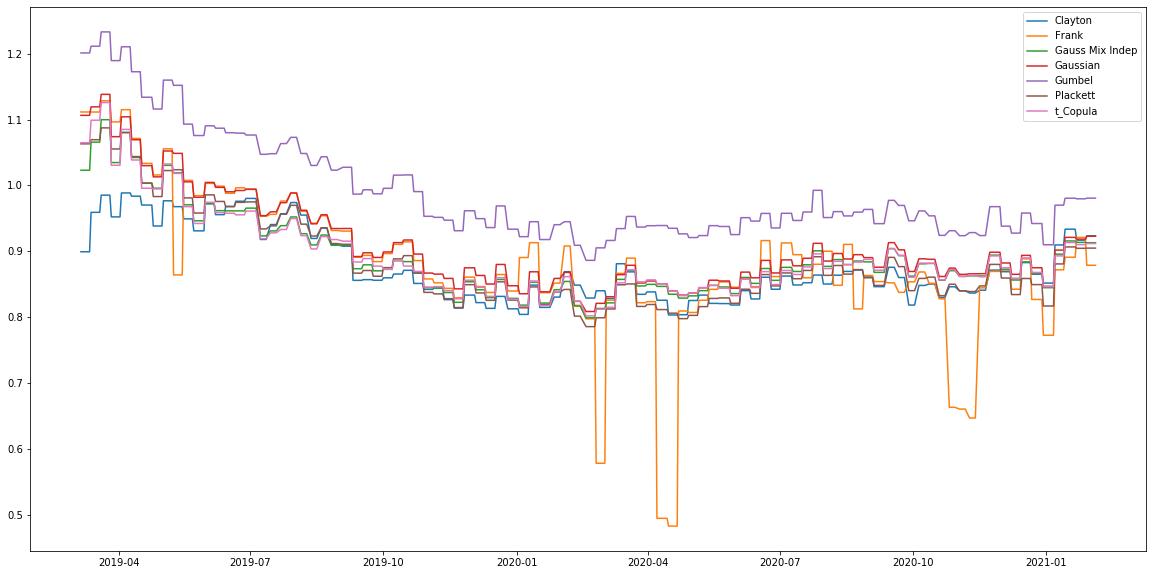

In [136]:
plt.figure(figsize=(20,10))
files1 = np.unique(OHR1.file)
for copula in copulae_names:
    to_plot1 = []
    for file in files1:
        try:
            testing_data = pd.read_csv("../processed_data/"+data_name+'/test/'+file)
        except:
            continue
        testing_data.Date = pd.to_datetime(testing_data.Date)
        f = OHR1.file == file
        r = OHR1.loc[:,'risk measure'] == rm
        c = OHR1.copula == copula
        testing_data.loc[:,'OHR'] = OHR1.loc[f&r&c,'OHR'].values[0]

        to_plot1.append(testing_data)

    to_plot1 = pd.concat(to_plot1)
    to_plot1 = to_plot1.sort_values('Date')
    plt.plot(to_plot1.Date, to_plot1.OHR, label=copula)
plt.legend()

In [130]:
with open('../src/configs/config_coingecko_future_v3_MM.json','r') as file:
    config = json.load(file)
config
data_name = config['data_name']
calibration_method  = config['calibration_method']
OHR2 = pd.read_csv('../results/'+data_name +'/'+calibration_method+'/OHR.csv')


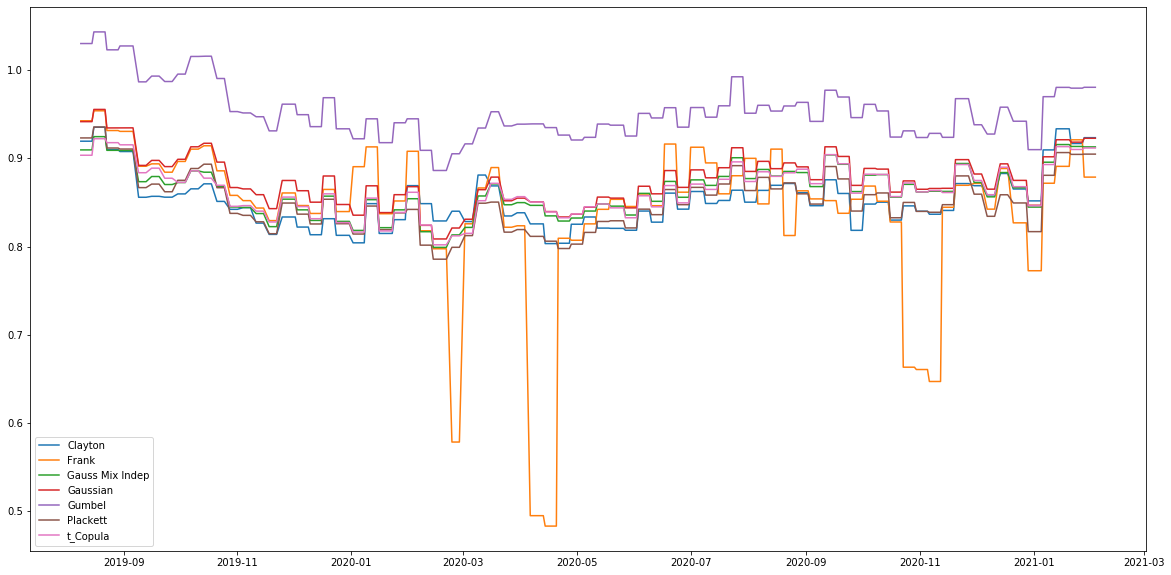

In [131]:
plt.figure(figsize=(20,10))
files2 = np.unique(OHR2.file_name)
for copula in copulae_names:
    to_plot2 = []
    for file in files2:
        try:
            testing_data = pd.read_csv("../processed_data/"+data_name+'/test/'+file)
        except:
            continue
        testing_data.Date = pd.to_datetime(testing_data.Date)
        f = OHR2.file_name == file
        r = OHR2.risk_measure == rm
        c = OHR2.copula == copula
        testing_data.loc[:,'OHR'] = OHR2.loc[f&r&c,'OHR'].values[0]

        to_plot2.append(testing_data)

    to_plot2 = pd.concat(to_plot2)
    to_plot2 = to_plot2.sort_values('Date')
    plt.plot(to_plot2.Date, to_plot2.OHR, label=copula)
plt.legend()

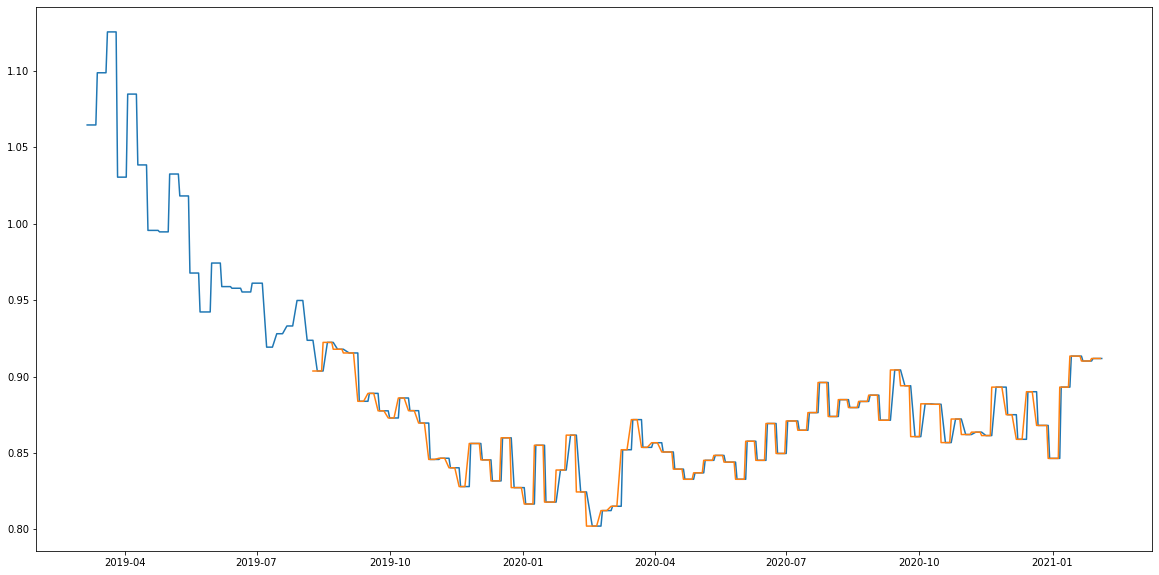

In [132]:
plt.figure(figsize=(20,10))

plt.plot(to_plot1.Date, to_plot1.OHR, label=copula)
plt.plot(to_plot2.Date, to_plot2.OHR, label=copula)